In [45]:
import pandas as pd 
import os 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import torch 
from scipy import signal 
from configparser import ConfigParser
from sklearn import preprocessing 

In [46]:
# Read in CSV file
Spectra_df = pd.read_csv('COSC525_Data.csv')
Spectra_df.columns = Spectra_df.iloc[0]
Spectra_df = Spectra_df.drop(0)
Spectra_df.set_index("raman_shifts", inplace=True)
print(Spectra_df.head(10))

0                         mixture              mixture              mixture  \
raman_shifts                                                                  
640            -500.1001271702408   -104.2673772818871  -146.17246380942015   
641            -157.5154387688308  -144.33036329392598   -34.62443697254639   
641           -265.92914233550255   -193.3925650439924   -75.07606120890705   
642            -29.34059471150977  -132.45366814308545  -20.527223043744016   
643           -239.74915273806985  -130.51335820221175   -63.97780900230282   
644           -128.15417325643648  -112.57132083237776    57.57229439016737   
645           -226.55501310781983    -76.6272416445754  -2.8767993915735133   
646            -304.9510291334809  -27.680806249820307   -64.32497687277464   
647            -259.3415781746225  -194.73170025910804   -7.772124578679723   
648            -11.72601707251306   -59.77960928344692   20.781870965465718   

0                         mixture              mixt

In [47]:
def snv(X):
    """Apply SNV normalization to a Pandas Series (column)."""
    mean = X.mean()
    std_dev = X.std()
    return (X- mean) / std_dev

def min_max(X): 

    """" Apply  the min-max scaling  for the normalization"""

    min = np.min(X , axis = 0)
    max = np.max(X, axis = 0)
    x_normalized = (X -min)/ (max - min )
    return x_normalized

def perform_tsne(X, n_components=3, perplexity =30):
    """
    Apply t-SNE to the dataset and plot the result.

    Parameters:
    - X: The high-dimensional data.
    - n_components: The dimension of the embedded space (default 2).
    - perplexity: The perplexity is related to the number of nearest neighbors that is used in other manifold learning algorithms. Larger datasets usually require a larger perplexity. Consider selecting a value between 5 and 50.

    Returns:
    - X_tsne: The dataset transformed into the embedded space.
    """

    # Apply t-SNE to the data
    tsne = TSNE(n_components=n_components, perplexity= perplexity, random_state=42)
    X_tsne = tsne.fit_transform(X)

    return X_tsne

def perform_pca(X, n_components = 2): 


    # Apply PCA to the data
    pca = PCA(n_components=n_components)
    X_pca = pca.fit_transform(X)


    return X_pca


In [48]:
Spectra_df.tail(30)

,mixture,mixture,mixture,mixture,mixture,mixture,mixture,mixture,mixture,mixture,...,nonLabel,nonLabel,nonLabel,nonLabel,nonLabel,nonLabel,nonLabel,nonLabel,nonLabel,nonLabel
raman_shifts,,,,,,,,,,,,,,,,,,,,,
1579,396.962487328834,134.44594598462754,-1.0061669425758737,150.8193278203944,97.41276788578398,143.629414094612,142.31814046247928,366.9153528784518,222.4708284667649,-42.62622920963804,...,12.65427537443611,291.44791911394714,163.38098110510327,-27.793661111089023,440.0471033732538,135.80670705693046,22.116652661182343,13.018589358815008,290.6794326818999,673.1544655776815
1580,150.54444594895176,137.176899268743,10.306939863472508,131.28929425148817,207.77175141159023,239.35162340106763,150.07748350771908,310.66266740071296,254.99772024840783,100.83948129271448,...,214.87456478535023,467.5861433747923,196.13869128291844,126.78588976180436,658.0504521750918,218.55189819209045,35.24945001711694,74.62514758974066,364.7442228447908,298.9257673958782
1581,426.1404309183272,63.90979040099046,-90.37155863430236,46.76098594858741,18.14582602269365,149.08401472960395,59.839225094550784,415.429160487176,160.53849554066255,48.31217117323831,...,433.1080587947581,267.7415905513189,83.90751253986673,61.3726598645153,390.0775243049357,78.30869816971972,41.3827500415573,-29.766761382818004,419.8262665399743,433.7162580190416
1581,162.75044632485515,-127.35536345981563,140.95830166772794,155.23442078077096,42.53491477854914,250.82658625628392,238.60337903457548,757.2148192895256,471.0931483920213,-17.208186341511464,...,364.3547492320504,650.9142544029746,164.68744172316656,-11.033370960542015,485.12830752602895,315.07709818884905,110.51656459415972,-84.15711664294759,387.9255478158812,401.5259043904152
1582,360.3744839046558,5.381452044175603,-55.70351520905752,116.7096127845034,69.93893703495269,340.5793276062104,211.3699552092985,647.0196142018322,297.6616631587531,-18.72162109497185,...,172.61461855228117,430.1041131795428,35.47846801774722,19.567773538237816,437.2027701216066,140.85708134827655,31.650903496323732,186.45409932073017,415.0420373187517,108.35465847144953
1583,48.01253378662659,211.120250906366,53.64295474601749,284.186575497557,-108.64218833422638,313.3422272918324,116.13896298883265,709.8435134376923,87.24402293591265,129.77183666995188,...,247.88764799071944,500.31114311268175,395.2805796115281,60.176069145223664,700.3008778400399,179.64862969280875,106.78577630422932,125.06690357659136,132.17570395090297,569.2024702741983
1583,327.66458609969413,-38.13895287984451,116.99767554363824,51.66532245770213,185.79145754490676,256.11527382559507,-7.089588256696516,476.68648521068826,-33.15978918138717,9.272156710358104,...,502.1738187826268,449.5353204340863,-85.90623530757875,40.79149164479532,527.4225964298312,274.45172526725946,22.921192574057383,198.68131319302304,529.3265166146739,165.0692898106863
1584,156.33063097274135,121.6038546789332,83.36061119448459,140.14586720270563,160.23979354622134,43.89845571994738,40.68431084282929,150.54849773440947,409.45020990193007,-12.22069121666027,...,397.47311216327216,135.77662137541483,303.91801144836063,135.41401682131436,576.5678916393954,2.2663501164279296,26.05716186198606,281.29734523840125,235.4944442123888,138.9550670929675
1585,342.0106585347239,109.34868757611002,194.73172570924,109.62822327034156,59.7027385436013,196.6917614873455,15.460669657535618,211.42951922245996,262.0740032809772,126.29326264600604,...,255.7855093679318,219.0350221683475,443.7533080672656,104.04362045916967,449.7367292172057,160.0924862851425,37.19369372420351,56.91501678111308,230.67945564640831,403.8597521330885


In [49]:
print(Spectra_df.columns)

Index(['mixture', 'mixture', 'mixture', 'mixture', 'mixture', 'mixture',
       'mixture', 'mixture', 'mixture', 'mixture',
       ...
       'nonLabel', 'nonLabel', 'nonLabel', 'nonLabel', 'nonLabel', 'nonLabel',
       'nonLabel', 'nonLabel', 'nonLabel', 'nonLabel'],
      dtype='object', name=0, length=500)


In [50]:
dataarray = {}
for column_name in Spectra_df.columns:
    Spectra_df[column_name] = Spectra_df[column_name].astype(float)
    min_max_col = min_max(Spectra_df[column_name])
    """print(f"Spectra Column min_max: {min_max_col}")
    X_tsne = perform_tsne(min_max_col)
    print(f"Spectra Column tsne: {X_tsne}")
    x_pca = perform_pca(min_max_col)
    """
    Spectra_df[column_name] = min_max_col
    
    

In [51]:
Spectra_df

,mixture,mixture,mixture,mixture,mixture,mixture,mixture,mixture,mixture,mixture,...,nonLabel,nonLabel,nonLabel,nonLabel,nonLabel,nonLabel,nonLabel,nonLabel,nonLabel,nonLabel
raman_shifts,,,,,,,,,,,,,,,,,,,,,
640,0.004151,0.008673,0.023461,0.017324,0.034146,0.003441,0.004884,0.005925,0.015145,0.016456,...,0.002848,0.007904,0.001738,0.123372,0.018309,0.001762,0.108069,0.005580,0.009905,0.003278
641,0.014309,0.006547,0.119711,0.006669,0.028997,0.002828,0.009499,0.002953,0.007447,0.118590,...,0.001507,0.002075,0.003605,0.127839,0.006957,0.002497,0.123936,0.004750,0.007010,0.001385
641,0.011094,0.003943,0.084807,0.000000,0.026543,0.001356,0.012424,0.009816,0.012600,0.073431,...,0.002934,0.006491,0.002677,0.000000,0.014654,0.002238,0.087271,0.007660,0.007568,0.005749
642,0.018109,0.007177,0.131875,0.007646,0.030151,0.002859,0.016300,0.013400,0.015775,0.140249,...,0.003206,0.017064,0.001321,0.052417,0.006889,0.002597,0.101471,0.008095,0.005863,0.002187
643,0.011870,0.007280,0.094383,0.013404,0.048745,0.002880,0.011306,0.006649,0.014757,0.187257,...,0.002256,0.009341,0.002664,0.181199,0.009442,0.002565,0.184881,0.002210,0.001124,0.001575
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1597,0.037115,0.019477,0.291316,0.017810,0.087504,0.004840,0.015975,0.033035,0.034876,0.292245,...,0.005394,0.032953,0.004878,0.270921,0.045949,0.005258,0.193083,0.028289,0.033337,0.037162
1598,0.031183,0.022490,0.399615,0.025126,0.105305,0.005519,0.026578,0.037265,0.038106,0.196315,...,0.004596,0.026486,0.005475,0.302668,0.040645,0.006793,0.215720,0.022057,0.033411,0.032760
1599,0.031508,0.016853,0.446657,0.021378,0.080842,0.006677,0.025196,0.041819,0.028129,0.252852,...,0.004932,0.038109,0.004858,0.365499,0.036636,0.004692,0.178321,0.008768,0.027742,0.032916


In [52]:
Spectra_df.shape

(1196, 500)

In [53]:
rowindex = np.arange(0,500)

In [54]:
print(rowindex)

[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244 245 24

In [55]:
mixture_count = 0
gypsum_count = 0
soapstone_count = 0
olivine_count = 0
nonlabel_count = 0
for column in Spectra_df.columns:
    if column == "mixture": mixture_count+=1
    elif column == "gypsum": gypsum_count+=1
    elif column == "olivine": olivine_count+=1
    elif  column == "soapstone": soapstone_count+=1
    else: nonlabel_count+=1
print(f"Mixture count: {mixture_count}")
print(f"Gypsum count: {gypsum_count}")
print(f"Soapstone count: {soapstone_count}")
print(f"Olivine count: {olivine_count}")
print(f"Nonlabel count: {nonlabel_count}")


Mixture count: 100
Gypsum count: 100
Soapstone count: 100
Olivine count: 100
Nonlabel count: 100


In [56]:
Spectra_df.columns

Index(['mixture', 'mixture', 'mixture', 'mixture', 'mixture', 'mixture',
       'mixture', 'mixture', 'mixture', 'mixture',
       ...
       'nonLabel', 'nonLabel', 'nonLabel', 'nonLabel', 'nonLabel', 'nonLabel',
       'nonLabel', 'nonLabel', 'nonLabel', 'nonLabel'],
      dtype='object', name=0, length=500)

In [57]:
Spectra_df

,mixture,mixture,mixture,mixture,mixture,mixture,mixture,mixture,mixture,mixture,...,nonLabel,nonLabel,nonLabel,nonLabel,nonLabel,nonLabel,nonLabel,nonLabel,nonLabel,nonLabel
raman_shifts,,,,,,,,,,,,,,,,,,,,,
640,0.004151,0.008673,0.023461,0.017324,0.034146,0.003441,0.004884,0.005925,0.015145,0.016456,...,0.002848,0.007904,0.001738,0.123372,0.018309,0.001762,0.108069,0.005580,0.009905,0.003278
641,0.014309,0.006547,0.119711,0.006669,0.028997,0.002828,0.009499,0.002953,0.007447,0.118590,...,0.001507,0.002075,0.003605,0.127839,0.006957,0.002497,0.123936,0.004750,0.007010,0.001385
641,0.011094,0.003943,0.084807,0.000000,0.026543,0.001356,0.012424,0.009816,0.012600,0.073431,...,0.002934,0.006491,0.002677,0.000000,0.014654,0.002238,0.087271,0.007660,0.007568,0.005749
642,0.018109,0.007177,0.131875,0.007646,0.030151,0.002859,0.016300,0.013400,0.015775,0.140249,...,0.003206,0.017064,0.001321,0.052417,0.006889,0.002597,0.101471,0.008095,0.005863,0.002187
643,0.011870,0.007280,0.094383,0.013404,0.048745,0.002880,0.011306,0.006649,0.014757,0.187257,...,0.002256,0.009341,0.002664,0.181199,0.009442,0.002565,0.184881,0.002210,0.001124,0.001575
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1597,0.037115,0.019477,0.291316,0.017810,0.087504,0.004840,0.015975,0.033035,0.034876,0.292245,...,0.005394,0.032953,0.004878,0.270921,0.045949,0.005258,0.193083,0.028289,0.033337,0.037162
1598,0.031183,0.022490,0.399615,0.025126,0.105305,0.005519,0.026578,0.037265,0.038106,0.196315,...,0.004596,0.026486,0.005475,0.302668,0.040645,0.006793,0.215720,0.022057,0.033411,0.032760
1599,0.031508,0.016853,0.446657,0.021378,0.080842,0.006677,0.025196,0.041819,0.028129,0.252852,...,0.004932,0.038109,0.004858,0.365499,0.036636,0.004692,0.178321,0.008768,0.027742,0.032916


500


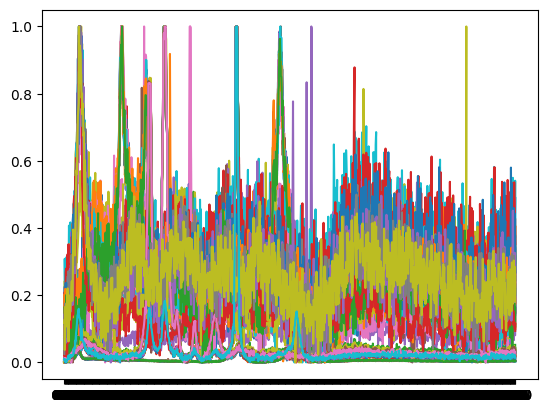

In [58]:
plt.plot(Spectra_df.index,Spectra_df["mixture"])
print(len(Spectra_df.columns))

In [71]:
from sklearn.model_selection import train_test_split
mixture_data = Spectra_df["mixture"].to_numpy()
print(f"Mixture shape: {mixture_data.shape}")
# Columns = Samples
# Rows = Intensity at raman_shift

soapstone_data = Spectra_df["soapstone"].to_numpy()
olivine_data = Spectra_df["olivine"].to_numpy()
gypsum_data = Spectra_df["gypsum"].to_numpy()
test_data = Spectra_df["nonLabel"].to_numpy()
print(f"Soapstone shape: {soapstone_data.shape}")

mixture_train, mixture_val, soapstone_train, soapstone_val, olivine_train, olivine_val, gypsum_train, gypsum_val = train_test_split(mixture_data.T, soapstone_data.T, olivine_data.T, gypsum_data.T, test_size=0.1, random_state=42)
print(f"Mixture train shape: {mixture_train.shape}")

train_data = np.zeros((4, 1196, mixture_train.shape[0]))
train_data[0] = mixture_train.T
train_data[1] = soapstone_train.T
train_data[2] = olivine_train.T
train_data[3] = gypsum_train.T

val_data = np.zeros((4, 1196, mixture_val.shape[0]))
val_data[0] = mixture_val.T
val_data[1] = soapstone_val.T
val_data[2] = olivine_val.T
val_data[3] = gypsum_val.T

# Print all of the val data and train data shapes
for i in range(4):
    print(f"Train data shape: {train_data[i].shape}")
    print(f"Val data shape: {val_data[i].shape}")


Mixture shape: (1196, 100)
Soapstone shape: (1196, 100)
Mixture train shape: (90, 1196)
Train data shape: (1196, 90)
Val data shape: (1196, 10)
Train data shape: (1196, 90)
Val data shape: (1196, 10)
Train data shape: (1196, 90)
Val data shape: (1196, 10)
Train data shape: (1196, 90)
Val data shape: (1196, 10)


## Model BluePrint

In [72]:
import torch
import torch.nn as nn
from torch.nn import Module, Sequential
from torch.nn import functional as func


__all__ = ['PreprocessUnit', 'ExtractorUnit', 'SENN']

class PreprocessUnit(Module):
    def __init__(self):
        super(PreprocessUnit, self).__init__()
        self.preprocess = Sequential(
                                    nn.Conv1d(1, 6, 3, padding=1),
                                    nn.BatchNorm1d(6),
                                    nn.ReLU(),
                                    nn.Conv1d(6, 12, 3, padding=1),
                                    nn.BatchNorm1d(12),
                                    nn.ReLU()
                                )

    def forward(self, spectra):
        return self.preprocess(spectra)


class ExtractorUnit(Module):
    def __init__(self, linearSize):
        super(ExtractorUnit, self).__init__()
        self.extractor = Sequential(
                                    nn.Conv1d(12, 6, 3, padding=1),
                                    nn.BatchNorm1d(6),
                                    nn.ReLU(),
                                    nn.Conv1d(6, 1, 3, padding=1),
                                    nn.BatchNorm1d(1),
                                    nn.ReLU(),
                                    nn.Linear(linearSize, linearSize, bias=True),
                                    nn.Sigmoid()
                                )

    def forward(self, spectra):
        return self.extractor(spectra)


class  SENN(Module):
    def __init__(self, preprocessUnit: Module, *extractors):
        super(SENN, self).__init__()
        self.preprocessUnit = preprocessUnit
        self.extractors = extractors

    def forward(self, spectrum):
        latentVar = self.preprocessUnit(spectrum)
        components = []
        for extractor in self.extractors:
            components.append(extractor(latentVar))
        return components

In [131]:
def fit_SENN(model, train_data, val_data, criterion, optimizers, comment, epochs=3):
    PRINT_TEMPLATE = '\tEpoch {}/{}: training loss: {:.4f}/{:.4f}/{:.4f} (SOAP/OLIV/GYP); ' + \
                        'train similarity: {:.4f}/{:.4f}/{:.4f} (SOAP/OLIV/GYP); ' + \
                        'validation loss: {:.4f}/{:.4f}/{:.4f} (SOAP/OLIV/GYP); ' + \
                        'validation similarity: {:.4f}/{:.4f}/{:.4f} (SOAP/OLIV/GYP)'
    train_soapstone_loss_record = np.zeros(epochs, dtype=np.float64)
    train_soapstone_similarity_record = np.zeros(epochs, dtype=np.float64)
    train_olivine_loss_record = np.zeros(epochs, dtype=np.float64)
    train_olivine_similarity_record = np.zeros(epochs, dtype=np.float64)
    train_gypsum_loss_record = np.zeros(epochs, dtype=np.float64)
    train_gypsum_similarity_record = np.zeros(epochs, dtype=np.float64)
    val_soapstone_loss_record = np.zeros(epochs, dtype=np.float64)
    val_soapstone_similarity_record = np.zeros(epochs, dtype=np.float64)
    val_olivine_loss_record = np.zeros(epochs, dtype=np.float64)
    val_olivine_similarity_record = np.zeros(epochs, dtype=np.float64)
    val_gypsum_loss_record = np.zeros(epochs, dtype=np.float64)
    val_gypsum_similarity_record = np.zeros(epochs, dtype=np.float64)
    
    for epoch in range(epochs):
        soapstone_train_loss = 0
        olivine_train_loss = 0
        gypsum_train_loss = 0
        soapstone_train_similarity = 0
        olivine_train_similarity = 0
        gypsum_train_similarity = 0
        train_set_length = 0
        for i_m in range(len(model)):
            model[i_m].train()
        ## Loop through training samples
        for i in range(train_data.shape[2]): 
            mixture = torch.from_numpy(train_data[0, :, i]).float().unsqueeze(0).unsqueeze(0)
            soapstone = torch.from_numpy(train_data[1, :, i]).float()
            olivine = torch.from_numpy(train_data[2, :, i]).float()
            gypsum = torch.from_numpy(train_data[3, :, i]).float()
            
            for i_o in range(len(optimizers)):
                optimizers[i_o].zero_grad()
            
            predict_soapstone = model[1](model[0](mixture))
            predict_olivine = model[2](model[0](mixture))
            predict_gypsum = model[3](model[0](mixture))
            soapstone_loss = criterion[0](predict_soapstone.squeeze(1), soapstone.unsqueeze(0))
            olivine_loss = criterion[1](predict_olivine.squeeze(1), olivine.unsqueeze(0))
            gypsum_loss = criterion[2](predict_gypsum.squeeze(1), gypsum.unsqueeze(0))
            soapstone_train_loss += soapstone_loss
            olivine_train_loss += olivine_loss
            gypsum_train_loss += gypsum_loss
            soapstone_similarity = comment(predict_soapstone.squeeze(1), soapstone)
            olivine_similarity = comment(predict_olivine.squeeze(1), olivine)
            gypsum_similarity = comment(predict_gypsum.squeeze(1), gypsum)
            soapstone_train_similarity += abs(sum(soapstone_similarity.detach().numpy()))
            olivine_train_similarity += abs(sum(olivine_similarity.detach().numpy()))
            gypsum_train_similarity += abs(sum(gypsum_similarity.detach().numpy()))
            soapstone_loss.backward()
            olivine_loss.backward()
            gypsum_loss.backward()
            train_set_length += 1
            for i_opt in range(3):
                optimizers[i_opt].step()
        # Evaluate the Validation Set for Model at the end of each epoch
        for i_m in range(len(model)):
            model[i_m].eval()
        val_soapstone_loss = 0
        val_olivine_loss = 0
        val_gypsum_loss = 0
        val_soapstone_similarity = 0
        val_olivine_similarity = 0
        val_gypsum_similarity = 0
        val_set_length = 0
        with torch.no_grad():
            for i in range(val_data.shape[2]):
                mixture_val = torch.from_numpy(val_data[0, :, i]).float().unsqueeze(0).unsqueeze(0)
                soapstone_val = torch.from_numpy(val_data[1, :, i]).float()
                olivine_val = torch.from_numpy(val_data[2, :, i]).float()
                gypsum_val = torch.from_numpy(val_data[3, :, i]).float()
                predict_soapstone_val = model[1](model[0](mixture_val))
                predict_olivine_val = model[2](model[0](mixture_val))
                predict_gypsum_val = model[3](model[0](mixture_val))
                soapstone_loss_val = criterion[0](predict_soapstone_val.squeeze(1), soapstone_val.unsqueeze(0))
                olivine_loss_val = criterion[1](predict_olivine_val.squeeze(1), olivine_val.unsqueeze(0))
                gypsum_loss_val = criterion[2](predict_gypsum_val.squeeze(1), gypsum_val.unsqueeze(0))
                val_soapstone_loss += soapstone_loss_val
                val_olivine_loss += olivine_loss_val
                val_gypsum_loss += gypsum_loss_val
                soapstone_similarity_val = comment(predict_soapstone_val.squeeze(1), soapstone_val)
                olivine_similarity_val = comment(predict_olivine_val.squeeze(1), olivine_val)
                gypsum_similarity_val = comment(predict_gypsum_val.squeeze(1), gypsum_val)
                val_soapstone_similarity += abs(sum(soapstone_similarity_val.detach().numpy()))
                val_olivine_similarity += abs(sum(olivine_similarity_val.detach().numpy()))
                val_gypsum_similarity += abs(sum(gypsum_similarity_val.detach().numpy()))
                val_set_length += 1

        train_soapstone_loss_record[epoch] = soapstone_train_loss
        train_olivine_loss_record[epoch] = olivine_train_loss
        train_gypsum_loss_record[epoch] = gypsum_train_loss
        train_soapstone_similarity_record[epoch] = soapstone_train_similarity / train_set_length
        train_olivine_similarity_record[epoch] = olivine_train_similarity / train_set_length
        train_gypsum_similarity_record[epoch] = gypsum_train_similarity / train_set_length
        val_soapstone_loss_record[epoch] = val_soapstone_loss
        val_olivine_loss_record[epoch] = val_olivine_loss
        val_gypsum_loss_record[epoch] = val_gypsum_loss
        val_soapstone_similarity_record[epoch] = val_soapstone_similarity / val_set_length
        val_olivine_similarity_record[epoch] = val_olivine_similarity / val_set_length
        val_gypsum_similarity_record[epoch] = val_gypsum_similarity / val_set_length

        print(PRINT_TEMPLATE.format(epoch + 1, epochs, train_soapstone_loss_record[epoch], train_olivine_loss_record[epoch], train_gypsum_loss_record[epoch],
                                    train_soapstone_similarity_record[epoch], train_olivine_similarity_record[epoch], train_gypsum_similarity_record[epoch], 
                                    val_soapstone_loss_record[epoch], val_olivine_loss_record[epoch], val_gypsum_loss_record[epoch], val_soapstone_similarity_record[epoch],
                                    val_olivine_similarity_record[epoch], val_gypsum_similarity_record[epoch]))
    return {'model': model,
            'soapstone_loss': train_soapstone_loss_record,
            'olivine_loss': train_olivine_loss_record,
            'gypsum_loss': train_gypsum_loss_record,
            'soapstone_simi': train_soapstone_similarity_record,
            'olivine_simi': train_olivine_similarity_record,
            'gypsum_simi': train_gypsum_similarity_record,
            'val_soapstone_loss': val_soapstone_loss_record,
            'val_olivine_loss': val_olivine_loss_record,
            'val_gypsum_loss': val_gypsum_loss_record,
            'val_soapstone_simi': val_soapstone_similarity_record,
            'val_olivine_simi': val_olivine_similarity_record,
            'val_gypsum_simi': val_gypsum_similarity_record}


In [132]:
import torch.nn as nn
import torch.optim as opt

modules = [
    PreprocessUnit(),
    ExtractorUnit(train_data.shape[1]),
    ExtractorUnit(train_data.shape[1]),
    ExtractorUnit(train_data.shape[1])
]
# losses
criterions = [
    nn.MSELoss(),
    nn.MSELoss(),
    nn.MSELoss()
]
# config optimizer and learning rate
optimizers = [
    opt.Adam([{'params': modules[1].parameters()}, {'params':modules[0].parameters()}], 0.001),
    opt.Adam(modules[2].parameters(), 0.001),
    opt.Adam(modules[3].parameters(), 0.001)
]
# evaluate result
comment = nn.CosineSimilarity()

In [133]:
print(f"{'Start training model!':=^100s}")
tape = fit_SENN(modules, train_data,val_data, criterions, optimizers, comment, epochs=50)

=======================================Start training model!========================================
	Epoch 1/50: training loss: 0.0000/0.0000/0.0000 (SOAP/OLIV/GYP); train similarity: 0.0000/0.0000/0.0000 (SOAP/OLIV/GYP); validation loss: 0.0000/0.0000/0.0000 (SOAP/OLIV/GYP); validation similarity: 0.0000/0.0000/0.0000 (SOAP/OLIV/GYP)
	Epoch 2/50: training loss: 0.0000/0.0000/0.0000 (SOAP/OLIV/GYP); train similarity: 0.0000/0.0000/0.0000 (SOAP/OLIV/GYP); validation loss: 0.0000/0.0000/0.0000 (SOAP/OLIV/GYP); validation similarity: 0.0000/0.0000/0.0000 (SOAP/OLIV/GYP)
	Epoch 3/50: training loss: 0.0000/0.0000/0.0000 (SOAP/OLIV/GYP); train similarity: 0.0000/0.0000/0.0000 (SOAP/OLIV/GYP); validation loss: 0.0000/0.0000/0.0000 (SOAP/OLIV/GYP); validation similarity: 0.0000/0.0000/0.0000 (SOAP/OLIV/GYP)
	Epoch 4/50: training loss: 0.0000/0.0000/0.0000 (SOAP/OLIV/GYP); train similarity: 0.0000/0.0000/0.0000 (SOAP/OLIV/GYP); validation loss: 0.0000/0.0000/0.0000 (SOAP/OLIV/GYP); validation 

KeyboardInterrupt: 

In [109]:
def plot_training_loss(tape):
    plt.figure(figsize=(10, 5))
    plt.plot(tape['soapstone_loss'], label='Soapstone', color='red')
    plt.plot(tape['olivine_loss'], label='Olivine', color='green')
    plt.plot(tape['gypsum_loss'], label='Gypsum', color='blue')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.title('Training Loss')
    plt.show()

In [110]:
def plot_training_similarity(tape):
    plt.figure(figsize=(10, 5))
    plt.plot(tape['soapstone_simi'], label='Soapstone', color='red')
    plt.plot(tape['olivine_simi'], label='Olivine', color='green')
    plt.plot(tape['gypsum_simi'], label='Gypsum', color='blue')
    plt.xlabel('Epochs')
    plt.ylabel('Similarity')
    plt.legend()
    plt.title('Training Similarity')
    plt.show()

In [120]:
def plot_validation_loss(tape):
    plt.figure(figsize=(10, 5))
    plt.plot(tape['val_soapstone_loss'], label='Soapstone', color='red')
    plt.plot(tape['val_olivine_loss'], label='Olivine', color='green')
    plt.plot(tape['val_gypsum_loss'], label='Gypsum', color='blue')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.title('Validation Loss')
    plt.show()
def plot_validation_similarity(tape):
    plt.figure(figsize=(10, 5))
    plt.plot(tape['val_soapstone_simi'], label='Soapstone', color='red')
    plt.plot(tape['val_olivine_simi'], label='Olivine', color='green')
    plt.plot(tape['val_gypsum_simi'], label='Gypsum', color='blue')
    plt.xlabel('Epochs')
    plt.ylabel('Similarity')
    plt.legend()
    plt.title('Validation Similarity')
    plt.show()

In [ ]:
# Plot training loss, training similarity, validation loss, and validation similarity as subplots
plt.subplot(2, 2, 1)
plot_training_loss(tape)
plt.subplot(2, 2, 2)
plot_training_similarity(tape)
plt.subplot(2, 2, 3)
plot_validation_loss(tape)
plt.subplot(2, 2, 4)
plot_validation_similarity(tape)

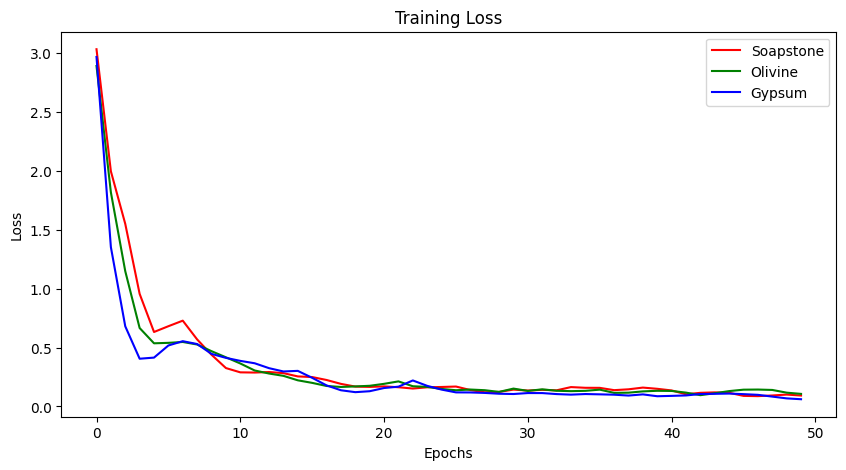

In [111]:
plot_training_loss(tape)

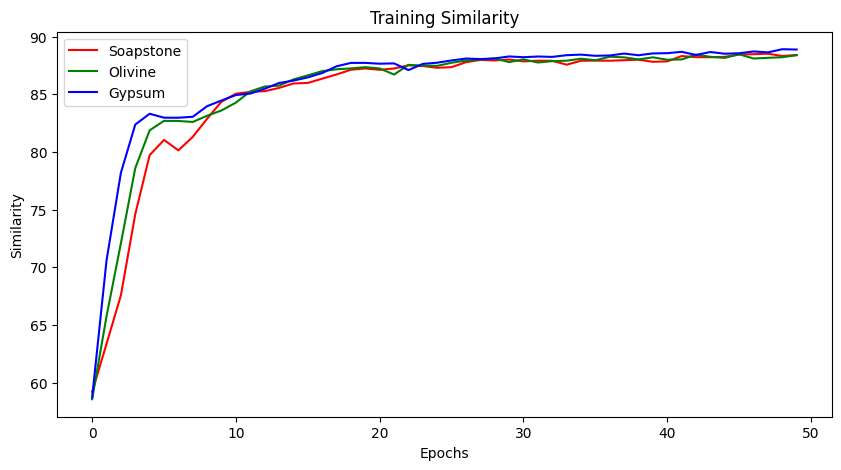

In [112]:
plot_similarity(tape)

In [113]:
print(test_data.shape)
mixture_test_data = []
soapstone_predict = []
olivine_predict = []
gypsum_predict = []
for i in range(test_data.shape[1]):
    test_spectra = torch.from_numpy(test_data[:, i]).float().unsqueeze(0).unsqueeze(0)
    print(f"Test spectra shape: {test_spectra.shape}")
    mixture_test_data.append(test_spectra.detach().numpy())
    soapstone_predict.append(modules[1](modules[0](test_spectra)).detach().numpy())
    print(f"Soapstone predict shape: {soapstone_predict[-1].shape}")
    olivine_predict.append(modules[2](modules[0](test_spectra)).detach().numpy())
    print(f"Olivine predict shape: {olivine_predict[-1].shape}")
    gypsum_predict.append(modules[3](modules[0](test_spectra)).detach().numpy())
    print(f"Gypsum predict shape: {gypsum_predict[-1].shape}")
    break
    

(1196, 100)
Test spectra shape: torch.Size([1, 1, 1196])
Soapstone predict shape: (1, 1, 1196)
Olivine predict shape: (1, 1, 1196)
Gypsum predict shape: (1, 1, 1196)


In [114]:
mixture_test_data[-1].shape
mixture_test_data[-1].squeeze(0).shape

(1, 1196)

In [115]:
def plot_testoutput(mixture_test_data, soapstone_predict, olivine_predict, gypsum_predict, index=0):
    plt.figure(figsize=(10, 5))
    plt.plot(mixture_test_data[index].squeeze(0).squeeze(0), label='Mixture', color='black')
    plt.plot(soapstone_predict[index].squeeze(0).squeeze(0), label='Soapstone', color='red')
    plt.plot(olivine_predict[index].squeeze(0).squeeze(0), label='Olivine', color='green')
    plt.plot(gypsum_predict[index].squeeze(0).squeeze(0), label='Gypsum', color='blue')
    plt.xlabel('Raman Shift')
    # need to fix xlim range [640, 1600]
    plt.ylabel('Intensity')
    plt.legend()
    plt.title('Test Output')
    plt.show()

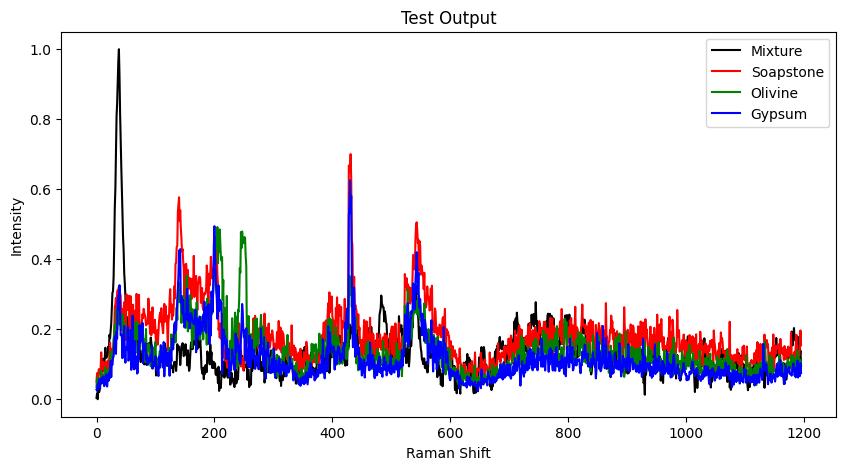

In [116]:
plot_testoutput(mixture_test_data, soapstone_predict, olivine_predict, gypsum_predict)

In [117]:
def subplot_spectra(mixture_test_data, soapstone_predict, olivine_predict, gypsum_predict, index=0):
    fig, axs = plt.subplots(4, 1, figsize=(10, 20))
    axs[0].plot(mixture_test_data[index].squeeze(0).squeeze(0), label='Mixture', color='black')
    axs[0].set_title('Mixture')
    axs[1].plot(soapstone_predict[index].squeeze(0).squeeze(0), label='Soapstone', color='red')
    axs[1].set_title('Soapstone')
    axs[2].plot(olivine_predict[index].squeeze(0).squeeze(0), label='Olivine', color='green')
    axs[2].set_title('Olivine')
    axs[3].plot(gypsum_predict[index].squeeze(0).squeeze(0), label='Gypsum', color='blue')
    axs[3].set_title('Gypsum')
    plt.show()

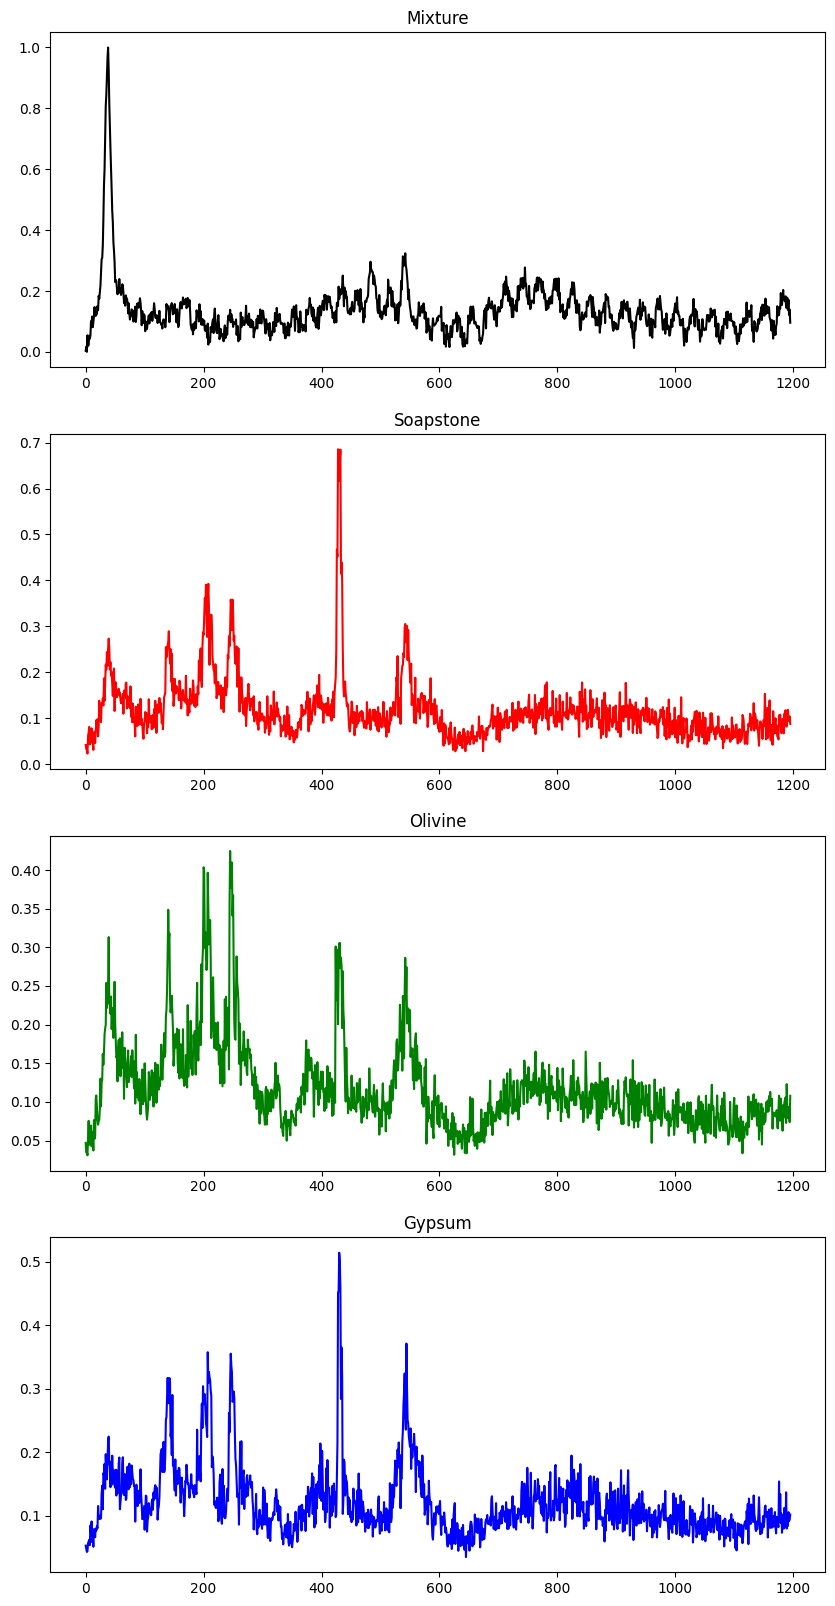

In [44]:
subplot_spectra(mixture_test_data, soapstone_predict, olivine_predict, gypsum_predict)

In [118]:
def test_SENN(model, val_data, criterions, comment):
    PRINT_TEMPLATE = '\ttest loss: {:.4f}/{:.4f}/{:.4f} (soapstone/olivine/gypsum); ' +\
                     'test similarity: {:.4f}/{:.4f}/{:.4f} (soapstone/olivine/gypsum)'
    soapstone_test_loss = 0
    olivine_test_loss = 0
    gypsum_test_loss = 0
    soapstone_test_similarity = 0
    olivine_test_similarity = 0
    gypsum_test_similarity = 0
    test_set_length = 0
    with torch.no_grad():
        for i in range(val_data.shape[2]):
            mixture = torch.from_numpy(val_data[0, :, i]).float().unsqueeze(0).unsqueeze(0)
            soapstone = torch.from_numpy(val_data[1, :, i]).float()
            olivine = torch.from_numpy(val_data[2, :, i]).float()
            gypsum = torch.from_numpy(val_data[3, :, i]).float()

            pred_soapstone = model[1](model[0](mixture))
            pred_olivine = model[2](model[0](mixture))
            pred_gypsum = model[3](model[0](mixture))
            soapstone_loss = criterions[0](pred_soapstone.squeeze(1), soapstone.unsqueeze(0))
            olivine_loss = criterions[1](pred_olivine.squeeze(1), olivine.unsqueeze(0))
            gypsum_loss = criterions[2](pred_gypsum.squeeze(1), gypsum.unsqueeze(0))
            soapstone_test_loss += soapstone_loss
            olivine_test_loss += olivine_loss
            gypsum_test_loss += gypsum_loss
            soapstone_similarity = comment(pred_soapstone.squeeze(1), soapstone)
            olivine_similarity = comment(pred_olivine.squeeze(1), olivine)
            gypsum_similarity = comment(pred_gypsum.squeeze(1), gypsum)
            soapstone_test_similarity += abs(sum(soapstone_similarity.detach().numpy()))
            olivine_test_similarity += abs(sum(olivine_similarity.detach().numpy()))
            gypsum_test_similarity += abs(sum(gypsum_similarity.detach().numpy()))
            test_set_length += 1
        soapstone_average_simi_test = soapstone_test_similarity / test_set_length
        olivine_average_simi_test = olivine_test_similarity / test_set_length
        gypsum_average_simi_test = gypsum_test_similarity / test_set_length
        print(PRINT_TEMPLATE.format(soapstone_test_loss, olivine_test_loss, gypsum_test_loss,
                                    soapstone_average_simi_test, olivine_average_simi_test, gypsum_average_simi_test))
        return {'soapstone_simi': soapstone_average_simi_test,
                'olivine_simi': olivine_average_simi_test,
                'gypsum_simi': gypsum_average_simi_test,
                'soapstone_loss': soapstone_test_loss,
                'olivine_loss': olivine_test_loss,
                'gypsum_loss': gypsum_test_loss}

In [119]:
trained_model = tape['model']
val_tape = test_SENN(trained_model, val_data, criterions, comment)

	test loss: 0.1638/0.3565/0.2383 (soapstone/olivine/gypsum); test similarity: 0.6337/0.6514/0.6436 (soapstone/olivine/gypsum)
